<a href="https://colab.research.google.com/github/FernandaCorlix/IA-Mapas/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#Los imports de las librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sl

#las librerias de la parte del codigo
from sklearn import datasets
from sklearn.decomposition import PCA
from scipy.sparse.linalg.isolve.lsqr import sqrt
from urllib.request import urlretrieve
from re import I
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from collections import Counter

([], <a list of 0 Text major ticklabel objects>)

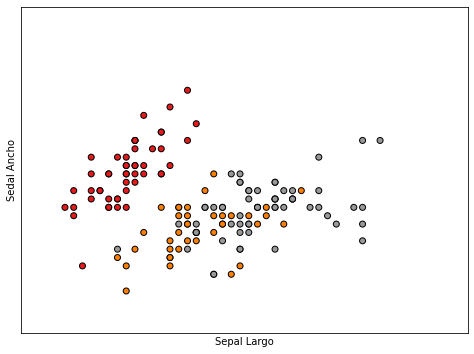

In [3]:
#Agreggamos el URL donde se encuentra el IRIS DATASET
iris_data = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

iris = datasets.load_iris()
X = iris.data[:, :2]  
y = iris.target

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 1

plt.figure(2, figsize=(8, 6))
plt.clf()

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal Largo")
plt.ylabel("Sedal Ancho")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())


In [4]:
def Fdistancia(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [19]:
class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        #Para calcular la distancia
        distances = [Fdistancia(x, x_train) for x_train in self.X_train]
        #argsort = Significa índices de valor dispuestos en orden ascendente
        k_idx = np.argsort(distances)[: self.k]
        #Más cercano
        k_neighbor_labels = [self.y_train[i] for i in k_idx]
        #Moda 
        most_common = Counter(k_neighbor_labels).most_common(1)
        return most_common[0][0]


def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=1234)

k = 3
clf = KNN(k=k)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print("KNN PRECISION", accuracy(y_test, predictions))

KNN PRECISION 1.0
